In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Lammentisation
# Stemming
# Stopwords removal

from https://stats.stackexchange.com/questions/304217/how-is-the-similarity-method-in-spacy-computed
- Spacy uses Glove in the background. Then word2vec

- **SpaCy already has the incredibly simple .vector, which computes the w2v vector as trained from the GloVe model**
- By default it's **cosine similarity**, with vectors averaged over the document for missing words.

In [ ]:
!python -m spacy download en_core_web_md --quiet

     |████████████████████████████████| 96.4 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


from https://spacy.io/usage/linguistic-features#vectors-similarity
- Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word. Word vectors can be generated using an algorithm like word2vec and usually look like this: Just a matrix

In [ ]:
import spacy
# nlp = spacy.load("en_core_web_lg")
nlp = spacy.load('en_core_web_md') # use medium model
######### RESTART RUNTIME AFTER FIRST RUN

**Using the simiarity attribute**

In [ ]:
doc1 = nlp(u'the person wear red T-shirt. He likes to walk and is always playful in nature ')
doc2 = nlp(u'this person is walking. That same person is one of the most joyful people I have met')
doc1.similarity(doc2)

0.8977779112576395

## *SCORE IS 0.89777*

**Using the vector attribute**

In [ ]:
np.size(doc1.vector), doc1.vector[:10]

(300, array([ 0.03568406,  0.14651284, -0.14489225, -0.06196288,  0.09980166,
         0.08404781,  0.01476733, -0.11692534, -0.07191351,  2.1163518 ],
       dtype=float32))

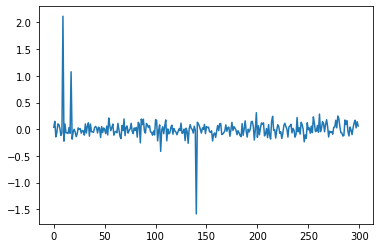

In [ ]:
plt.plot(doc1.vector)

Plotting clearly shows how some elements in the vector have a greater magnitude. This should most likely correspond to the terms *red, walk, playful* (I guess)

In [ ]:
df = pd.DataFrame({'Text': [], 'Has Vector':[], 'Vector Norm': [], 'Is out of Vecab':[]})

In [ ]:
for token in doc1:
    df2 = {'Text': token.text, 'Has Vector': token.has_vector, 
           'Vector Norm': token.vector_norm, 'Is out of Vecab' : token.is_oov}
    df = df.append(df2, ignore_index = True)

In [ ]:
df

,Text,Has Vector,Vector Norm,Is out of Vecab
0,the,1.0,4.709350,0.0
1,person,True,6.158658,False
2,wear,True,7.019624,False
3,red,True,6.283091,False
4,T,True,6.070901,False
5,-,True,5.603344,False
6,shirt,True,6.752304,False
7,.,True,4.931635,False
8,He,True,6.080851,False
9,likes,True,6.536640,False


In [ ]:
word_try = nlp(u'wear')
np.linalg.norm(word_try.vector)
# answer matches with what is given

7.0196238

## Problems with Spacy (from the docs only)
- There’s no objective definition of similarity. **Whether “I like burgers” and “I like pasta” is similar depends on your application.** Both talk about food preferences, which makes them very similar – but if you’re analyzing mentions of food, those sentences are pretty dissimilar, because they talk about very different foods.
- The similarity of Doc and Span objects defaults to the average of the token vectors. This means that the v**ector for “fast food” is the average of the vectors for “fast” and “food”, which isn’t necessarily representative of the phrase “fast food”.**
- Vector averaging means that the **vector of multiple tokens is insensitive to the order of the words.** Two documents expressing the same meaning with dissimilar wording will return a lower similarity score than two documents that happen to contain the same words while expressing different meanings.

# use sense2vec (ERRORS ONLY)
from https://explosion.ai/blog/sense2vec-reloaded

In [ ]:
# !pip install sense2vec --quiet

In [ ]:
# import spacy
# from sense2vec import Sense2VecComponent

# # nlp = spacy.load("en_core_web_sm")
# s2v = Sense2VecComponent(nlp.vocab).from_disk("/path/to/s2v_reddit_2015_md")
# nlp.add_pipe(s2v)

# doc = nlp("A sentence about natural language processing.")
# assert doc[3:6].text == "natural language processing"
# freq = doc[3:6]._.s2v_freq
# vector = doc[3:6]._.s2v_vec
# most_similar = doc[3:6]._.s2v_most_similar(3)
# [(('machine learning', 'NOUN'), 0.8986967),
#  (('computer vision', 'NOUN'), 0.8636297),
#  (('deep learning', 'NOUN'), 0.8573361)]

# Sentence Transformers

In [ ]:
!pip install -U sentence-transformers --quiet

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [ ]:
sentences = ['the person wear red T-shirt. He likes to walk and is always playful in nature ', 
             'this person is walking. That same person is one of the most joyful people I have met']

In [ ]:

sentence_embeddings = model.encode(sentences)

# for sentence, embedding in zip(sentences, sentence_embeddings):
#     print("Sentence:", sentence)
#     print("Embedding:", embedding)
#     print("")

In [ ]:
len(sentence_embeddings), len(sentence_embeddings[0]), sentence_embeddings

(2, 768, array([[-0.5303763 , -0.23440322,  0.8950737 , ...,  0.8021552 ,
         -0.27924305, -0.22536555],
        [-0.1914063 , -0.09804709,  1.1571229 , ...,  0.7882167 ,
         -0.51777446, -0.51538944]], dtype=float32))

In [ ]:
# get similarity
from sentence_transformers import util
util.pytorch_cos_sim(sentence_embeddings[0], sentence_embeddings[1])

tensor([[0.6027]])

# Preprocess 
like https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

In [ ]:
text_df = pd.DataFrame({'Text':[]})
text_df['Text'] = sentences
text_df

,Text
0,the person wear red T-shirt. He likes to walk ...
1,this person is walking. That same person is on...


### Punctuation Removal, lowercasing

In [ ]:
import string #library that contains punctuation
# string.punctuation

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation]).lower()
    # punctuationfree = punctuationfree.apply(lambda x: x.lower())
    return punctuationfree

#storing the puntuation free text
text_df['clean_text']= text_df['Text'].apply(lambda x:remove_punctuation(x))
text_df

,Text,clean_text
0,the person wear red T-shirt. He likes to walk ...,the person wear red tshirt he likes to walk an...
1,this person is walking. That same person is on...,this person is walking that same person is one...


In [ ]:
text_df['clean_text'][1]

'this person is walking that same person is one of the most joyful people i have met'

### Tokenised

In [ ]:
# from nltk.tokenize import word_tokenize
# nltk.download('punkt')

In [ ]:
# text_df['text_tokenised'] = text_df['clean_text'].apply(lambda x: word_tokenize(x))

In [ ]:
# text_df['text_tokenised'][1]

### Remove Stop Words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def remove_stopwords(text):
    output= [i for i in text.split(' ') if i not in stopwords]
    return output

#applying the function
text_df['no_stopwords'] = text_df['clean_text'].apply(remove_stopwords)
text_df['no_stopwords'] = text_df['no_stopwords'].apply(lambda x: " ".join(x))

In [ ]:
text_df

,Text,clean_text,no_stopwords
0,the person wear red T-shirt. He likes to walk ...,the person wear red tshirt he likes to walk an...,person wear red tshirt likes walk always playf...
1,this person is walking. That same person is on...,this person is walking that same person is one...,person walking person one joyful people met


### Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
lemmatizer.lemmatize('goes')

'go'

In [ ]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
df['text_lemmatized'] = df.text.apply(lemmatize_text)
df

,text,text_lemmatized
0,this was cheesy,"[this, wa, cheesy]"
1,she likes these books,"[she, like, these, book]"
2,wow this is great,"[wow, this, is, great]"


In [ ]:
text_df['tkn_lem'] = text_df.no_stopwords.apply(lemmatize_text)
text_df

,Text,clean_text,no_stopwords,tkn_lem
0,the person wear red T-shirt. He likes to walk ...,the person wear red tshirt he likes to walk an...,person wear red tshirt likes walk always playf...,"[person, wear, red, tshirt, like, walk, always..."
1,this person is walking. That same person is on...,this person is walking that same person is one...,person walking person one joyful people met,"[person, walking, person, one, joyful, people,..."


In [ ]:
text_df['Text'][0], text_df['no_stopwords'][0], text_df['tkn_lem'][0]

('the person wear red T-shirt. He likes to walk and is always playful in nature ',
 'person wear red tshirt likes walk always playful nature ',
 ['person',
  'wear',
  'red',
  'tshirt',
  'like',
  'walk',
  'always',
  'playful',
  'nature'])

In [ ]:
text_df['tkn_lem_sent'] = text_df['tkn_lem'].apply(lambda x: " ".join(x))
text_df['tkn_lem_sent']

0    person wear red tshirt like walk always playfu...
1          person walking person one joyful people met
Name: tkn_lem_sent, dtype: object

In [ ]:
str1 = text_df['tkn_lem_sent'][0]
str2 = text_df['tkn_lem_sent'][1]

In [ ]:
str1, str2

('person wear red tshirt like walk always playful nature',
 'person walking person one joyful people met')

In [ ]:
doc1 = nlp(text_df['tkn_lem_sent'][0])
doc2 = nlp(text_df['tkn_lem_sent'][1])
doc1.similarity(doc2)

0.7964082444365307

## *NEW SCORE 0.7964*

**Clearly the similarity score is going to be lesser than earlier. But this approach will be better when comparing big descriptive answers since the main terms (keypoints) will be given priority compared to the usual stopwords. Even though the maximum score will be lesser, but surely more robust**